Import packages

In [116]:
import pyforest
pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

Read in dataset

In [2]:
df = pd.read_csv('overwatch-diary.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,date,time,season,game_id,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,...,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists,scoped,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,12/4/2016,NaN,3,1.0,2387,NaN,NaN,NaN,Win,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/4/2016,NaN,3,2.0,2387,2367,-20,NaN,Loss,2617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/4/2016,NaN,3,2.0,NaN,NaN,NaN,NaN,Loss,2617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/4/2016,NaN,3,3.0,2367,2367,0,NaN,-,2680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/15/2016,NaN,3,4.0,2367,2367,0,NaN,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check datatypes

In [4]:
df.dtypes

date                        object
time                        object
season                       int64
game_id                    float64
sr_start                    object
sr_finish                   object
sr_delta                    object
streak_number               object
result                      object
my_team_sr                  object
enemy_team_sr               object
team_sr_delta               object
my_team_1                   object
my_team_2                   object
my_team_3                   object
my_team_4                   object
my_team_5                   object
my_team_6                   object
enemy_team_1                object
enemy_team_2                object
enemy_team_3                object
enemy_team_4                object
enemy_team_5                object
enemy_team_6                object
map                         object
round                       object
capscore                    object
score_distance              object
time_left           

Check for null values

In [5]:
df.isna()

,date,time,season,game_id,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,...,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists,scoped,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,False,True,False,False,False,True,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,True,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,True,False,False,True,True,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,True,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,True,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3295,False,False,False,False,True,True,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3296,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3297,False,False,False,False,True,True,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [6]:
df.isna().sum()

date                          0
time                       1794
season                        0
game_id                     732
sr_start                   1625
sr_finish                  1627
sr_delta                   1627
streak_number              1045
result                        0
my_team_sr                   44
enemy_team_sr                44
team_sr_delta                48
my_team_1                     4
my_team_2                    10
my_team_3                    12
my_team_4                    12
my_team_5                    16
my_team_6                    14
enemy_team_1                 29
enemy_team_2                 26
enemy_team_3                 25
enemy_team_4                 25
enemy_team_5                 25
enemy_team_6                 25
map                           0
round                         6
capscore                     23
score_distance             1517
time_left                   518
team_role                     5
match_length                107
charcter

In [7]:
df.shape

(3299, 50)

Check column names

In [8]:
df.columns

Index(['date', 'time', 'season', 'game_id', 'sr_start', 'sr_finish',
       'sr_delta', 'streak_number', 'result', 'my_team_sr', 'enemy_team_sr',
       'team_sr_delta', 'my_team_1', 'my_team_2', 'my_team_3', 'my_team_4',
       'my_team_5', 'my_team_6', 'enemy_team_1', 'enemy_team_2',
       'enemy_team_3', 'enemy_team_4', 'enemy_team_5', 'enemy_team_6', 'map',
       'round', 'capscore', 'score_distance', 'time_left', 'team_role',
       'match_length', 'charcter_1', 'character_2', 'character_3',
       'communication', 'note', 'psychological_condition', 'eliminations',
       'objective_kills', 'damage', 'healing', 'deaths', 'weapon_accuracy',
       'offensive_assists', 'defensive_assists', 'scoped', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49'],
      dtype='object')

In [9]:
df.result.value_counts()

L       1050
W       1032
Loss     467
Win      453
Draw     261
-         33
l          2
DC         1
Name: result, dtype: int64

Plot null values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

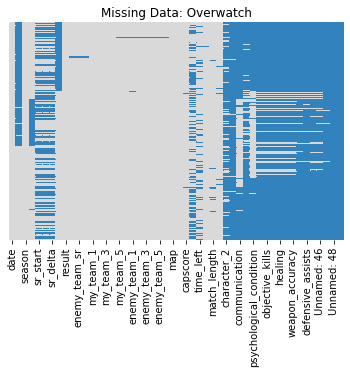

In [10]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Overwatch')
plt.show()

In [11]:
rows = df.shape[0]
null_total = df.isnull().sum()
missing_percent = (null_total/rows)*100
missing_percent

date                        0.000000
time                       54.380115
season                      0.000000
game_id                    22.188542
sr_start                   49.257351
sr_finish                  49.317975
sr_delta                   49.317975
streak_number              31.676266
result                      0.000000
my_team_sr                  1.333737
enemy_team_sr               1.333737
team_sr_delta               1.454986
my_team_1                   0.121249
my_team_2                   0.303122
my_team_3                   0.363747
my_team_4                   0.363747
my_team_5                   0.484995
my_team_6                   0.424371
enemy_team_1                0.879054
enemy_team_2                0.788118
enemy_team_3                0.757805
enemy_team_4                0.757805
enemy_team_5                0.757805
enemy_team_6                0.757805
map                         0.000000
round                       0.181873
capscore                    0.697181
s

In [12]:
pd.DataFrame(missing_percent ,columns = ["missing_percent"])

<IPython.core.display.Javascript object>

,missing_percent
date,0.000000
time,54.380115
season,0.000000
game_id,22.188542
sr_start,49.257351
sr_finish,49.317975
sr_delta,49.317975
streak_number,31.676266
result,0.000000
my_team_sr,1.333737


In [13]:
df.drop(['note','eliminations','objective_kills','damage','healing','deaths','weapon_accuracy',
      'offensive_assists','defensive_assists','scoped',
         'Unnamed: 46','Unnamed: 47','Unnamed: 48','Unnamed: 49'],axis=1, inplace= True)

In [14]:
df.dtypes

date                        object
time                        object
season                       int64
game_id                    float64
sr_start                    object
sr_finish                   object
sr_delta                    object
streak_number               object
result                      object
my_team_sr                  object
enemy_team_sr               object
team_sr_delta               object
my_team_1                   object
my_team_2                   object
my_team_3                   object
my_team_4                   object
my_team_5                   object
my_team_6                   object
enemy_team_1                object
enemy_team_2                object
enemy_team_3                object
enemy_team_4                object
enemy_team_5                object
enemy_team_6                object
map                         object
round                       object
capscore                    object
score_distance              object
time_left           

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

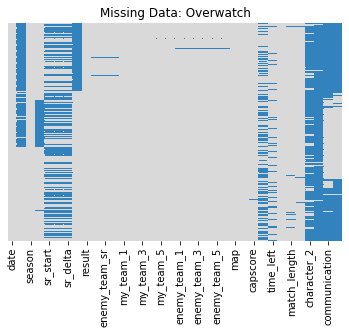

In [15]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Overwatch')
plt.show()

In [16]:
df.drop(['character_2','character_3','psychological_condition'],axis=1, inplace= True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

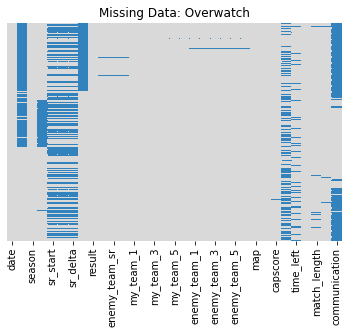

In [17]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Overwatch')
plt.show()

In [18]:
df.sr_start.isna()

0       False
1       False
2        True
3       False
4       False
        ...  
3294    False
3295     True
3296    False
3297     True
3298    False
Name: sr_start, Length: 3299, dtype: bool

In [19]:
df['sr_start'].fillna(method='ffill', inplace=True)

In [20]:
df.sr_start.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3294    False
3295    False
3296    False
3297    False
3298    False
Name: sr_start, Length: 3299, dtype: bool

In [21]:
df.sr_start.value_counts()

-       46
2616    26
2672    19
2648    18
2654    18
        ..
2353     1
2272     1
2801     1
2828     1
2834     1
Name: sr_start, Length: 683, dtype: int64

In [22]:
df.sr_start.max()

'3017'

In [23]:
df['sr_start'].min()

'-'

In [24]:
df = df[df['sr_start'] != '-']

In [25]:
df['sr_start'].min()

'1966'

In [26]:
df.dtypes

date               object
time               object
season              int64
game_id           float64
sr_start           object
sr_finish          object
sr_delta           object
streak_number      object
result             object
my_team_sr         object
enemy_team_sr      object
team_sr_delta      object
my_team_1          object
my_team_2          object
my_team_3          object
my_team_4          object
my_team_5          object
my_team_6          object
enemy_team_1       object
enemy_team_2       object
enemy_team_3       object
enemy_team_4       object
enemy_team_5       object
enemy_team_6       object
map                object
round              object
capscore           object
score_distance     object
time_left          object
team_role          object
match_length       object
charcter_1         object
communication      object
dtype: object

In [27]:
df['sr_start'] = df['sr_start'].astype(int)

In [28]:
df.sr_finish.isna().sum()


1617

In [29]:
df['sr_finish'].fillna(method='ffill', inplace=True)

In [30]:
df['sr_finish'].fillna(method='bfill', inplace=True)

In [31]:
df.sr_finish.isna().sum()

0

In [32]:
df['sr_finish'] = df['sr_finish'].astype(int)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

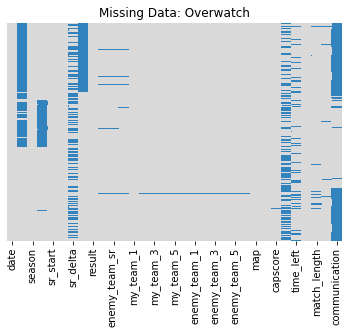

In [33]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Overwatch')
plt.show()

In [34]:
df.head()

,date,time,season,game_id,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,...,enemy_team_6,map,round,capscore,score_distance,time_left,team_role,match_length,charcter_1,communication
0,12/4/2016,NaN,3,1.0,2387,2367,NaN,NaN,Win,-,...,WormWood,Nepal,-,wwllw,3-2,NaN,CP,22,Ana,NaN
1,12/4/2016,NaN,3,2.0,2387,2367,-20,NaN,Loss,2617,...,Trianta,Dorado,1,-,74.54,0,Attack,6,Ana,NaN
2,12/4/2016,NaN,3,2.0,2387,2367,NaN,NaN,Loss,2617,...,Trianta,Dorado,2,0,NaN,0,Defend,4,Torbjorn,NaN
3,12/4/2016,NaN,3,3.0,2367,2367,0,NaN,-,2680,...,Worsttoplane,Gibraltar,1,1,0,NaN,Attack,0,Ana,NaN
4,12/15/2016,NaN,3,4.0,2367,2367,0,NaN,-,-,...,Starfish,Dorado,1,0,0,NaN,Attack,0,NaN,NaN


In [35]:
df['sr_delta'] = df['sr_start'] - df['sr_finish']

In [36]:
df.dtypes

date               object
time               object
season              int64
game_id           float64
sr_start            int64
sr_finish           int64
sr_delta            int64
streak_number      object
result             object
my_team_sr         object
enemy_team_sr      object
team_sr_delta      object
my_team_1          object
my_team_2          object
my_team_3          object
my_team_4          object
my_team_5          object
my_team_6          object
enemy_team_1       object
enemy_team_2       object
enemy_team_3       object
enemy_team_4       object
enemy_team_5       object
enemy_team_6       object
map                object
round              object
capscore           object
score_distance     object
time_left          object
team_role          object
match_length       object
charcter_1         object
communication      object
dtype: object

In [37]:
rows = df.shape[0]
null_total = df.isnull().sum()
missing_percent = (null_total/rows)*100
missing_percent

date               0.000000
time              54.565017
season             0.000000
game_id           22.502306
sr_start           0.000000
sr_finish          0.000000
sr_delta           0.000000
streak_number     32.124193
result             0.000000
my_team_sr         1.352598
enemy_team_sr      1.352598
team_sr_delta      1.475561
my_team_1          0.122963
my_team_2          0.307409
my_team_3          0.368890
my_team_4          0.368890
my_team_5          0.491854
my_team_6          0.430372
enemy_team_1       0.768521
enemy_team_2       0.799262
enemy_team_3       0.768521
enemy_team_4       0.768521
enemy_team_5       0.768521
enemy_team_6       0.768521
map                0.000000
round              0.184445
capscore           0.707040
score_distance    46.019059
time_left         15.770058
team_role          0.153704
match_length       3.289271
charcter_1         1.844451
communication     60.651706
dtype: float64

In [38]:
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y')


<IPython.core.display.Javascript object>

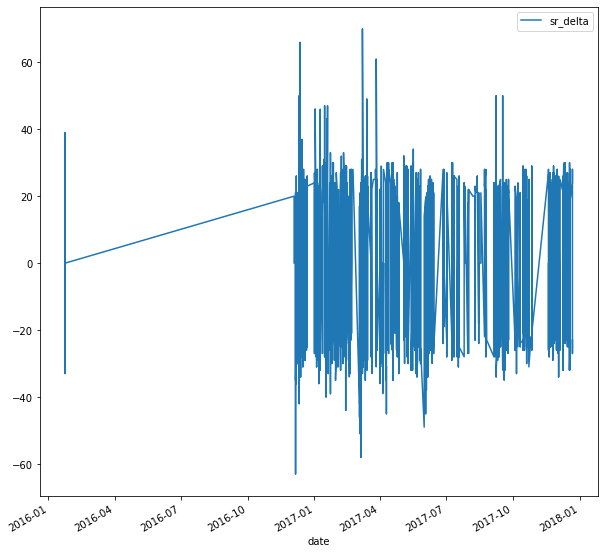

In [39]:
plt = df.plot(x="date", y="sr_delta",figsize= (10,10))
plt

In [40]:
df.date.value_counts().min()

1

In [41]:
df.date.min()

Timestamp('2016-01-24 00:00:00')

In [42]:
df['date'] = df[df['date'] >= '2017-01-24 00:00:00' ]

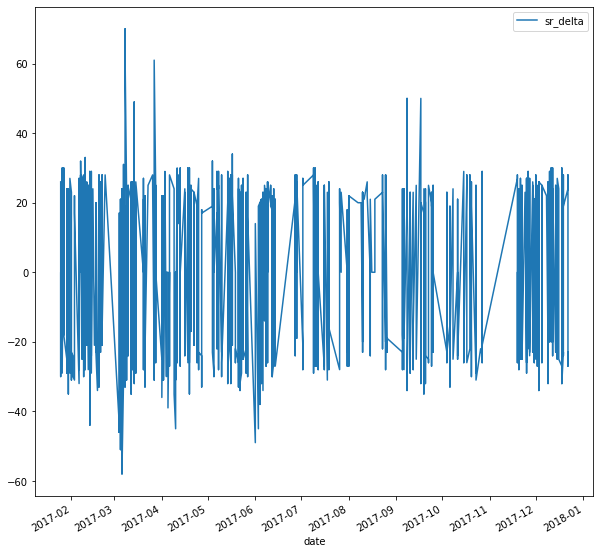

In [43]:
plt = df.plot(x="date", y="sr_delta",figsize= (10,10))
plt

In [44]:
df.dtypes

date               object
time               object
season              int64
game_id           float64
sr_start            int64
sr_finish           int64
sr_delta            int64
streak_number      object
result             object
my_team_sr         object
enemy_team_sr      object
team_sr_delta      object
my_team_1          object
my_team_2          object
my_team_3          object
my_team_4          object
my_team_5          object
my_team_6          object
enemy_team_1       object
enemy_team_2       object
enemy_team_3       object
enemy_team_4       object
enemy_team_5       object
enemy_team_6       object
map                object
round              object
capscore           object
score_distance     object
time_left          object
team_role          object
match_length       object
charcter_1         object
communication      object
dtype: object

In [45]:
df.head()

,date,time,season,game_id,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,...,enemy_team_6,map,round,capscore,score_distance,time_left,team_role,match_length,charcter_1,communication
0,NaT,NaN,3,1.0,2387,2367,20,NaN,Win,-,...,WormWood,Nepal,-,wwllw,3-2,NaN,CP,22,Ana,NaN
1,NaT,NaN,3,2.0,2387,2367,20,NaN,Loss,2617,...,Trianta,Dorado,1,-,74.54,0,Attack,6,Ana,NaN
2,NaT,NaN,3,2.0,2387,2367,20,NaN,Loss,2617,...,Trianta,Dorado,2,0,NaN,0,Defend,4,Torbjorn,NaN
3,NaT,NaN,3,3.0,2367,2367,0,NaN,-,2680,...,Worsttoplane,Gibraltar,1,1,0,NaN,Attack,0,Ana,NaN
4,NaT,NaN,3,4.0,2367,2367,0,NaN,-,-,...,Starfish,Dorado,1,0,0,NaN,Attack,0,NaN,NaN


In [46]:
df.streak_number.value_counts()

-1     492
1      474
2      260
-2     248
0      152
3      136
-3     127
-4      71
4       60
-5      35
5       31
6       22
-6      18
-7      18
-       12
-8      11
-9      10
7        6
9        5
-13      4
-10      4
-11      3
8        2
-12      2
10       2
11       2
12       1
Name: streak_number, dtype: int64

In [47]:
df.streak_number.isna().sum()

1045

In [48]:
df['streak_number'].fillna(0, inplace=True)

In [49]:
df.streak_number.isna().sum()

0

In [50]:
df.dtypes

date               object
time               object
season              int64
game_id           float64
sr_start            int64
sr_finish           int64
sr_delta            int64
streak_number      object
result             object
my_team_sr         object
enemy_team_sr      object
team_sr_delta      object
my_team_1          object
my_team_2          object
my_team_3          object
my_team_4          object
my_team_5          object
my_team_6          object
enemy_team_1       object
enemy_team_2       object
enemy_team_3       object
enemy_team_4       object
enemy_team_5       object
enemy_team_6       object
map                object
round              object
capscore           object
score_distance     object
time_left          object
team_role          object
match_length       object
charcter_1         object
communication      object
dtype: object

In [51]:
df.streak_number.value_counts()

0      1045
-1      492
1       474
2       260
-2      248
0       152
3       136
-3      127
-4       71
4        60
-5       35
5        31
6        22
-6       18
-7       18
-        12
-8       11
-9       10
7         6
9         5
-10       4
-13       4
-11       3
10        2
8         2
-12       2
11        2
12        1
Name: streak_number, dtype: int64

In [52]:
df['streak_number'] = df['streak_number'].replace(['-'],0)

In [53]:
df['sr_finish'] = df['sr_finish'].astype(int)

<IPython.core.display.Javascript object>

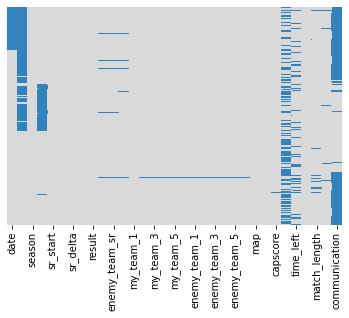

In [54]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')



In [55]:
df.drop(['time','communication'],axis=1, inplace= True)

<IPython.core.display.Javascript object>

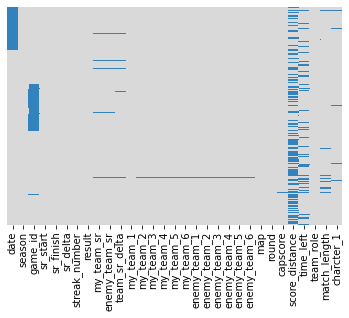

In [56]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [57]:
rows = df.shape[0]
null_total = df.isnull().sum()
missing_percent = (null_total/rows)*100
missing_percent

date              19.827851
season             0.000000
game_id           22.502306
sr_start           0.000000
sr_finish          0.000000
sr_delta           0.000000
streak_number      0.000000
result             0.000000
my_team_sr         1.352598
enemy_team_sr      1.352598
team_sr_delta      1.475561
my_team_1          0.122963
my_team_2          0.307409
my_team_3          0.368890
my_team_4          0.368890
my_team_5          0.491854
my_team_6          0.430372
enemy_team_1       0.768521
enemy_team_2       0.799262
enemy_team_3       0.768521
enemy_team_4       0.768521
enemy_team_5       0.768521
enemy_team_6       0.768521
map                0.000000
round              0.184445
capscore           0.707040
score_distance    46.019059
time_left         15.770058
team_role          0.153704
match_length       3.289271
charcter_1         1.844451
dtype: float64

In [58]:
df.game_id.value_counts()

173.0    14
35.0     14
189.0    13
123.0    13
42.0     13
         ..
324.0     1
403.0     1
284.0     1
445.0     1
517.0     1
Name: game_id, Length: 538, dtype: int64

In [59]:
df.date.isna().sum()

645

In [60]:
df.shape

(3253, 31)

In [61]:
df.drop(['game_id','score_distance'],axis=1, inplace= True)

In [62]:
df.shape

(3253, 29)

In [63]:
df.result.value_counts()

L       1038
W       1004
Loss     467
Win      453
Draw     255
-         33
l          2
DC         1
Name: result, dtype: int64

In [64]:
df['result'] = df['result'].replace(['Loss'],'L')

In [65]:
df.result.value_counts()

L       1505
W       1004
Win      453
Draw     255
-         33
l          2
DC         1
Name: result, dtype: int64

In [66]:
df['result'] = df['result'].replace(['Win'],'W')

In [67]:
df['result'] = df['result'].replace(['-','1'],'Draw')

In [68]:
df.result.value_counts()

L       1505
W       1457
Draw     288
l          2
DC         1
Name: result, dtype: int64

In [69]:
df['result'] = df['result'].replace([1],'Draw')

In [70]:
df.result.value_counts()

L       1505
W       1457
Draw     288
l          2
DC         1
Name: result, dtype: int64

In [71]:
df = df.drop(df[df['result'] == 'l'].index)

In [72]:
df.result.value_counts()

L       1505
W       1457
Draw     288
DC         1
Name: result, dtype: int64

In [73]:
rows = df.shape[0]
null_total = df.isnull().sum()
missing_percent = (null_total/rows)*100
missing_percent

date             19.840049
season            0.000000
sr_start          0.000000
sr_finish         0.000000
sr_delta          0.000000
streak_number     0.000000
result            0.000000
my_team_sr        1.353430
enemy_team_sr     1.353430
team_sr_delta     1.476469
my_team_1         0.123039
my_team_2         0.307598
my_team_3         0.369117
my_team_4         0.369117
my_team_5         0.492156
my_team_6         0.430637
enemy_team_1      0.768994
enemy_team_2      0.799754
enemy_team_3      0.768994
enemy_team_4      0.768994
enemy_team_5      0.768994
enemy_team_6      0.768994
map               0.000000
round             0.184559
capscore          0.707475
time_left        15.718241
team_role         0.153799
match_length      3.260535
charcter_1        1.845586
dtype: float64

In [74]:
df.dropna(inplace=True)

In [75]:
df.shape

(2065, 29)

In [77]:
df.sr_finish.max()

3017

In [78]:
df.head()

,date,season,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,enemy_team_sr,team_sr_delta,...,enemy_team_4,enemy_team_5,enemy_team_6,map,round,capscore,time_left,team_role,match_length,charcter_1
645,2017-01-25 00:00:00,3,2133,2107,26,0,L,2119,2083,-36,...,Moriatry,Bill,ZihengXi,Eichenwalde,1,1,0,Attack,6.5,Zen
646,2017-01-25 00:00:00,3,2133,2107,26,0,L,2119,2083,-36,...,Moriatry,Bill,ZihengXi,Eichenwalde,2,2,0:15,Defend,6,Lucio
647,2017-01-25 00:00:00,3,2107,2107,0,0,Draw,2109,2104,-5,...,Shukudai,EIcyZelda,Maxakainu,Hollywood,1,0,0,Attack,4.5,Ana
648,2017-01-25 00:00:00,3,2107,2107,0,0,Draw,2109,2104,-5,...,Shukudai,EIcyZelda,Maxakainu,Hollywood,2,0,0,Defend,0,Torbjorn
650,2017-01-25 00:00:00,3,2135,2135,0,0,Draw,2127,2013,-114,...,WebSnoopy,Hailstorm222,Saltyomnic,Eichenwalde,1,0,0,Defend,4,Torbjorn


In [79]:
df.charcter_1.value_counts()

Zen         683
Mercy       553
Ana         285
Moira       129
Symmetra    128
Lucio       118
Zarya        47
Torbjorn     43
-            18
Dva          14
Orisa        14
torbjorn     13
mercy         7
LUcio         3
zen           2
Winston       2
Pharah        2
Roadhog       1
ANa           1
Mery          1
zarya         1
Name: charcter_1, dtype: int64

In [80]:
df['hero'] = df['charcter_1'].astype(str)

In [93]:
df['hero'] = df['hero'].replace(['ZEN'],'Zen')

In [142]:
df['hero'] = df['hero'].replace(['Mery'],'Mercy')

In [143]:
df.hero.value_counts()

Zen         685
Mercy       561
Ana         286
Moira       129
Symmetra    128
Lucio       121
Torbjorn     56
Zarya        48
Dva          14
Orisa        14
Winston       2
Pharah        2
Roadhog       1
Name: hero, dtype: int64

In [108]:
df['hero'] = df['hero'].str.capitalize()

In [110]:
df = df.drop(df[df['hero'] == '-'].index)

In [111]:
df.hero.value_counts()

Zen         685
Mercy       560
Ana         286
Moira       129
Symmetra    128
Lucio       121
Torbjorn     56
Zarya        48
Dva          14
Orisa        14
Winston       2
Pharah        2
Mery          1
Roadhog       1
Name: hero, dtype: int64

In [117]:
df.head()

,date,season,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,enemy_team_sr,team_sr_delta,my_team_1,my_team_2,my_team_3,my_team_4,my_team_5,my_team_6,enemy_team_1,enemy_team_2,enemy_team_3,enemy_team_4,enemy_team_5,enemy_team_6,map,round,capscore,time_left,team_role,match_length,hero
645,2017-01-25 00:00:00,3,2133,2107,26,0,L,2119,2083,-36,JustWingIt,Dyce,DJstewie,Ransby,Exit,TheBigFro,Biggenz,GozTra,HydroBuster,Moriatry,Bill,ZihengXi,Eichenwalde,1,1,0,Attack,6.5,Zen
646,2017-01-25 00:00:00,3,2133,2107,26,0,L,2119,2083,-36,JustWingIt,Dyce,DJstewie,Ransby,Exit,TheBigFro,Biggenz,GozTra,HydroBuster,Moriatry,Bill,ZihengXi,Eichenwalde,2,2,0:15,Defend,6,Lucio
647,2017-01-25 00:00:00,3,2107,2107,0,0,Draw,2109,2104,-5,JustWingIt,IllusioniMind,LeLover,TrueARTS,Extenze,Boomoto,Kronful,Dethhound,Dunsparce,Shukudai,EIcyZelda,Maxakainu,Hollywood,1,0,0,Attack,4.5,Ana
648,2017-01-25 00:00:00,3,2107,2107,0,0,Draw,2109,2104,-5,JustWingIt,IllusioniMind,LeLover,TrueARTS,Extenze,Boomoto,Kronful,Dethhound,Dunsparce,Shukudai,EIcyZelda,Maxakainu,Hollywood,2,0,0,Defend,0,Torbjorn
650,2017-01-25 00:00:00,3,2135,2135,0,0,Draw,2127,2013,-114,JustWingIt,GalaticGuard,Derwood,Kirito,Bouba,Ludo,Diego,ScoobySaves,OhYou,WebSnoopy,Hailstorm222,Saltyomnic,Eichenwalde,1,0,0,Defend,4,Torbjorn


In [115]:
df.drop(['charcter_1'],axis=1, inplace= True)

In [118]:
df.map.value_counts()

Temple of Anubis       232
Numbani                209
Route 66               192
Hanamura               189
Hollywood              162
Dorado                 158
Gibraltar              156
Eichenwalde            146
Volskaya Industries    145
King's Row             144
Horizon                 99
Eichenwade              43
Volskaya                35
JunkerTown              27
Volkaya Industries      27
EichenWalde             27
Gilbraltar              25
Junkertown              14
king's Row               7
junkerTown               3
Hoirzon                  2
Oasis                    1
Ilios                    1
TEmple of Anubis         1
Nepal                    1
Lijang Tower             1
Name: map, dtype: int64

In [119]:
df['map'] = df['map'].astype(str)

In [120]:
df['map'] = df['map'].str.capitalize()

In [121]:
df.map.value_counts()

Temple of anubis       233
Numbani                209
Route 66               192
Hanamura               189
Eichenwalde            173
Hollywood              162
Dorado                 158
Gibraltar              156
King's row             151
Volskaya industries    145
Horizon                 99
Junkertown              44
Eichenwade              43
Volskaya                35
Volkaya industries      27
Gilbraltar              25
Hoirzon                  2
Ilios                    1
Oasis                    1
Lijang tower             1
Nepal                    1
Name: map, dtype: int64

In [122]:
df['map'] = df['map'].replace(['Volkaya industries'],'Volskaya')

In [123]:
df['map'] = df['map'].replace(['Gilbraltar'],'Gibraltar')

In [124]:
df['map'] = df['map'].replace(['Eichenwalde'],'Eichenwade')

In [125]:
df.map.value_counts()

Temple of anubis       233
Eichenwade             216
Numbani                209
Route 66               192
Hanamura               189
Gibraltar              181
Hollywood              162
Dorado                 158
King's row             151
Volskaya industries    145
Horizon                 99
Volskaya                62
Junkertown              44
Hoirzon                  2
Lijang tower             1
Ilios                    1
Oasis                    1
Nepal                    1
Name: map, dtype: int64

In [126]:
df['map'] = df['map'].replace(['Hoirzon'],'Horizon')

In [127]:
df.map.value_counts()

Temple of anubis       233
Eichenwade             216
Numbani                209
Route 66               192
Hanamura               189
Gibraltar              181
Hollywood              162
Dorado                 158
King's row             151
Volskaya industries    145
Horizon                101
Volskaya                62
Junkertown              44
Lijang tower             1
Ilios                    1
Oasis                    1
Nepal                    1
Name: map, dtype: int64

In [128]:
df['map'] = df['map'].replace(['Temple of anubis'],'Temple_of_Anubis')

In [129]:
df['map'] = df['map'].replace(['Eichenwade'],'Eichenwalde')

In [130]:
df['map'] = df['map'].replace(['Route 66'],'Route_66')

In [133]:
df["map"] = df["map"].replace(["King's row"],"Kings_Row")

In [134]:
df.map.value_counts()

Temple_of_Anubis       233
Eichenwalde            216
Numbani                209
Route_66               192
Hanamura               189
Gibraltar              181
Hollywood              162
Dorado                 158
Kings_Row              151
Volskaya industries    145
Horizon                101
Volskaya                62
Junkertown              44
Lijang tower             1
Oasis                    1
Ilios                    1
Nepal                    1
Name: map, dtype: int64

In [135]:
df['map'] = df['map'].replace(['Volskaya industries'],'Volskaya')

In [136]:
df['map'] = df['map'].replace(['Lijang tower'],'Ligiang_Tower')

In [137]:
df.map.value_counts()

Temple_of_Anubis    233
Eichenwalde         216
Numbani             209
Volskaya            207
Route_66            192
Hanamura            189
Gibraltar           181
Hollywood           162
Dorado              158
Kings_Row           151
Horizon             101
Junkertown           44
Oasis                 1
Ilios                 1
Nepal                 1
Ligiang_Tower         1
Name: map, dtype: int64

In [138]:
df.head()

,date,season,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,enemy_team_sr,team_sr_delta,my_team_1,my_team_2,my_team_3,my_team_4,my_team_5,my_team_6,enemy_team_1,enemy_team_2,enemy_team_3,enemy_team_4,enemy_team_5,enemy_team_6,map,round,capscore,time_left,team_role,match_length,hero
645,2017-01-25 00:00:00,3,2133,2107,26,0,L,2119,2083,-36,JustWingIt,Dyce,DJstewie,Ransby,Exit,TheBigFro,Biggenz,GozTra,HydroBuster,Moriatry,Bill,ZihengXi,Eichenwalde,1,1,0,Attack,6.5,Zen
646,2017-01-25 00:00:00,3,2133,2107,26,0,L,2119,2083,-36,JustWingIt,Dyce,DJstewie,Ransby,Exit,TheBigFro,Biggenz,GozTra,HydroBuster,Moriatry,Bill,ZihengXi,Eichenwalde,2,2,0:15,Defend,6,Lucio
647,2017-01-25 00:00:00,3,2107,2107,0,0,Draw,2109,2104,-5,JustWingIt,IllusioniMind,LeLover,TrueARTS,Extenze,Boomoto,Kronful,Dethhound,Dunsparce,Shukudai,EIcyZelda,Maxakainu,Hollywood,1,0,0,Attack,4.5,Ana
648,2017-01-25 00:00:00,3,2107,2107,0,0,Draw,2109,2104,-5,JustWingIt,IllusioniMind,LeLover,TrueARTS,Extenze,Boomoto,Kronful,Dethhound,Dunsparce,Shukudai,EIcyZelda,Maxakainu,Hollywood,2,0,0,Defend,0,Torbjorn
650,2017-01-25 00:00:00,3,2135,2135,0,0,Draw,2127,2013,-114,JustWingIt,GalaticGuard,Derwood,Kirito,Bouba,Ludo,Diego,ScoobySaves,OhYou,WebSnoopy,Hailstorm222,Saltyomnic,Eichenwalde,1,0,0,Defend,4,Torbjorn


In [139]:
df.shape

(2047, 29)

In [140]:
df.streak_number.value_counts()

-1     388
1      369
0      327
2      207
-2     184
0      142
3      109
-3     100
-4      60
4       47
5       25
-5      18
6       16
-6      14
-7      13
-9       7
-8       6
-13      4
-10      3
10       2
11       2
-12      2
7        2
Name: streak_number, dtype: int64

In [147]:
df.to_csv('clean_overwatch.csv', sep='\t')

In [145]:
df.describe()

,season,sr_start,sr_finish,sr_delta
count,2047.000000,2047.000000,2047.000000,2047.000000
mean,4.889106,2599.547631,2600.588178,-1.040547
std,1.354517,182.527272,181.656220,23.785142
min,3.000000,2107.000000,2107.000000,-57.000000
25%,4.000000,2490.000000,2491.000000,-24.000000
50%,5.000000,2614.000000,2616.000000,0.000000
75%,6.000000,2714.000000,2714.000000,23.000000
max,7.000000,3017.000000,3017.000000,70.000000


In [146]:
df.match_length.value_counts()

4         456
8         432
7         158
2         114
4.5        94
6          94
3          87
5          86
8.5        64
1          63
6.5        57
1.5        56
2.5        51
5.5        46
7.5        45
Check      40
3.5        38
9          37
10          7
0           3
0.5         3
11          2
9.5         2
1:00        1
2:09        1
16          1
4:00        1
Checks      1
22          1
4:09        1
9.58        1
3.3         1
-           1
3.6         1
check       1
Name: match_length, dtype: int64